In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io as io

In [36]:
images = ['train_01_img1.gif' , 'train_01_img2.gif' , 'train_02_img1.gif' , 'train_02_img2.gif' , 'train_03_img1.gif'
         ,'train_03_img2.gif' , 'train_04_img1.gif' , 'train_04_img2.gif' , 'train_05_img1.gif' , 'train_05_img2.gif',
         'train_06_img1.gif' , 'train_06_img2.gif' , 'train_07_img1.gif' , 'train_07_img2.gif' , 'train_08_img1.gif',
         'train_08_img2.gif' , 'train_09_img1.gif' , 'train_09_img2.gif' , 'train_10_img1.gif','train_10_img2.gif']

In [37]:
list1 = []
def read_images(x):
    for i in x :  
        img_i = io.imread(i) 
        list1.append(img_i)
    return list1

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
def show_images(images,titles):
    n_ims = len(images)
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(10,2,n) 
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        if n < 20: n += 1
    plt.show()

In [39]:
def preprocessing_images(x):
    for i in range(len(x)):
        x[i] = x[i].flatten()
        x[i].resize((1,10000))
    X = np.vstack(tuple(x)) 
    X = X.T
    return X 

In [40]:
img_list = read_images(images)

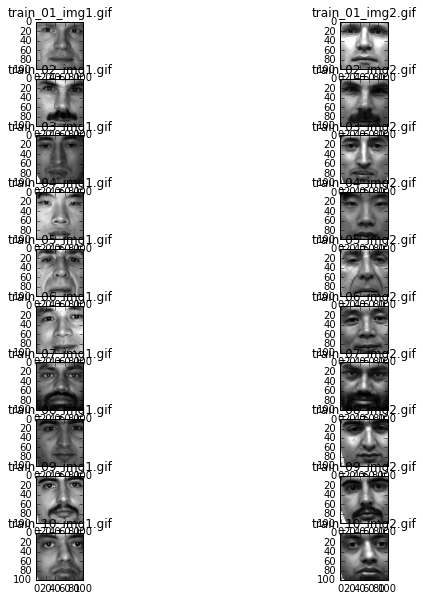

In [41]:
show_images(img_list , images)

In [42]:
V = preprocessing_images(img_list)

In [43]:
V.shape

(10000, 20)

In [44]:
V = V + 1E-5

In [45]:
'''def initialize(V ,r) : 
    W = np.random.rand(V.shape[0],r)
    H = np.random.rand(r,V.shape[1]) 
    if(np.count_nonzero(W<0) > 0 ):
        W[W<0] = 0
    
    if(np.count_nonzero(H<0) > 0 ):
        H[H<0] = 0
    return W,H '''

'def initialize(V ,r) : \n    W = np.random.rand(V.shape[0],r)\n    H = np.random.rand(r,V.shape[1]) \n    if(np.count_nonzero(W<0) > 0 ):\n        W[W<0] = 0\n    \n    if(np.count_nonzero(H<0) > 0 ):\n        H[H<0] = 0\n    return W,H '

In [46]:
def nmf(V,r, iterate):
    itert = []
    div = [] 
    V_avg = V.mean()
    W = np.random.rand(V.shape[0],r)*V_avg
    H = np.random.rand(r,V.shape[1])*V_avg 
    '''  if(np.count_nonzero(W<0) > 0 ):
        W[W<0] = 0
    
    if(np.count_nonzero(H<0) > 0 ):
        H[H<0] = 0 '''
    W_H = W.dot(H) 
    #print W_H
    V_WH = V / W_H 
    #print V_WH
    for i in range(iterate):
        W, H, W_H, V_WH = update(V, W, H, W_H, V_WH) 
        divergence = ((V * np.log(V_WH)) - V + W_H).sum()
        div.append(divergence)
        itert.append(i)
        print("At iteration {i}, the divergence is {divergence}".format(
            i=i, divergence=divergence))
    return W,H,itert,div
        

In [47]:
def update(V, W, H, WH, V_over_WH):
    H = H *(np.dot(V_over_WH.T, W) / W.sum(axis=0)).T

    WH = W.dot(H)
    V_over_WH = V/ WH
    W = W * (np.dot(V_over_WH, H.T) ) / H.sum(axis=1)

    WH = W.dot(H)
    V_over_WH = V / WH
    return W, H, WH, V_over_WH

In [155]:
#W5,H5,itert5,div5 = nmf(V,5,100)
#W10,H10,itert10,div10 = nmf(V,10,750)
#W15,H15,itert15,div15 = nmf(V,15,750)
W19,H19,itert19,div19 = nmf(V,19,1500)

At iteration 0, the divergence is 1209540.08599
At iteration 1, the divergence is 1172467.98745
At iteration 2, the divergence is 1138361.38143
At iteration 3, the divergence is 1105766.5837
At iteration 4, the divergence is 1073599.47582
At iteration 5, the divergence is 1041036.40873
At iteration 6, the divergence is 1007465.65688
At iteration 7, the divergence is 972478.71645
At iteration 8, the divergence is 935887.412571
At iteration 9, the divergence is 897751.305873
At iteration 10, the divergence is 858394.829296
At iteration 11, the divergence is 818390.355551
At iteration 12, the divergence is 778489.503244
At iteration 13, the divergence is 739505.044703
At iteration 14, the divergence is 702173.202136
At iteration 15, the divergence is 667042.240297
At iteration 16, the divergence is 634422.685251
At iteration 17, the divergence is 604403.282167
At iteration 18, the divergence is 576908.486719
At iteration 19, the divergence is 551765.380483
At iteration 20, the divergence 

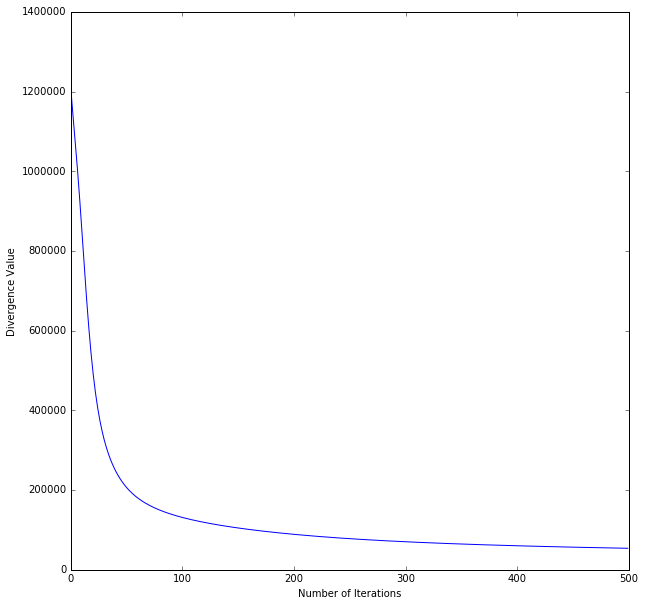

In [49]:
plt.xlabel('Number of Iterations')
plt.ylabel('Divergence Value')
plt.plot(itert19,div19)

In [50]:
from __future__ import division 
list1=[div5,div10,div15,div19] 
avg = [] 
for i in list1:
    avg.append(sum(i) / len(i) ) 

In [51]:
avg

[763968.07136766438,
 507672.02741016616,
 429926.62058172963,
 130378.16304640168]

In [52]:
iterate = np.arange(4)
iterate

array([0, 1, 2, 3])

In [53]:
r = [5,10,15,19]

In [54]:
len(avg)

4

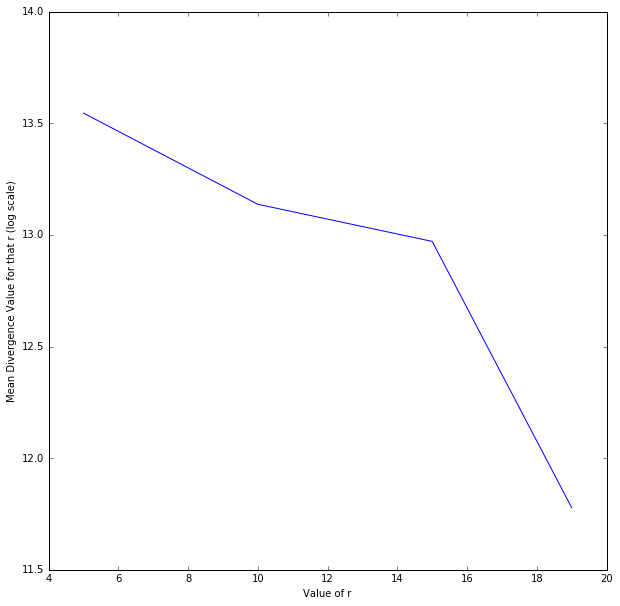

In [55]:
plt.xlabel('Value of r') 
plt.ylabel('Mean Divergence Value for that r (log scale)')
plt.plot(r,np.log(avg))

In [56]:
test_images = ['test_11_img1.gif' , 'test_11_img2.gif' , 'test_12_img1.gif' , 'test_12_img2.gif']

In [57]:
list2 = []
def read_testimages(x):
    for i in x :  
        img_i = io.imread(i) 
        list2.append(img_i)
    return list2

In [58]:
test_img_list = read_testimages(test_images)

In [59]:
x = io.imread('test_11_img1.gif') 
x = x.flatten()
x.resize((1,10000))
X = np.vstack(tuple(x)) 
X = X.T 


In [60]:
def preprocessing_testimages(x):
    for i in range(len(x)):
        x[i] = x[i].flatten()
        x[i].resize((1,10000))
    X = np.vstack(tuple(x)) 
    X = X.T
    return X 

In [61]:
V_test = preprocessing_testimages(test_img_list)

In [62]:
V_test.shape

(10000, 4)

In [63]:
V_test = V_test +  1E-5

In [64]:
W10

array([[  1.29936459e-01,   3.56444084e+01,   1.93169799e+01, ...,
          4.58495298e-01,   1.54995160e+01,   1.54398241e-10],
       [  1.79437572e+00,   4.37472735e+01,   3.51708884e+01, ...,
          1.72909159e+01,   1.83899279e+01,   6.01838641e-07],
       [  4.98571347e-01,   5.45719356e+01,   4.56696819e+01, ...,
          3.48435066e+01,   3.86408348e+01,   2.57225884e-05],
       ..., 
       [  6.83100616e+01,   6.93172930e+01,   7.10099344e+01, ...,
          1.37583319e+00,   2.14281061e+00,   1.09540225e+01],
       [  2.90478318e+01,   6.66999436e+01,   6.18464458e+01, ...,
          5.00458248e-02,   1.37409343e+00,   2.90956486e+01],
       [  6.44302695e-05,   4.75338887e+01,   1.25795913e+02, ...,
          8.76106341e-07,   9.37258751e+01,   1.17262024e+02]])

In [65]:
def nmf_test(V,W,r, iterate):
    itert = []
    div = [] 
    V_avg = V.mean()
    #W = np.random.rand(V.shape[0],r)*V_avg
    H = np.random.rand(r,V.shape[1])*V_avg 
    '''  if(np.count_nonzero(W<0) > 0 ):
        W[W<0] = 0
    
    if(np.count_nonzero(H<0) > 0 ):
        H[H<0] = 0 '''
    W_H = W.dot(H) 
    #print W_H
    V_WH = V / W_H 
    #print V_WH
    for i in range(iterate):
        H, W_H, V_WH = update_test(V, W, H, W_H, V_WH) 
        divergence = ((V * np.log(V_WH)) - V + W_H).sum()
        div.append(divergence)
        itert.append(i)
        print("At iteration {i}, the divergence is {divergence}".format(
            i=i, divergence=divergence))
    return H,itert,div

In [66]:
def update_test(V, W, H, WH, V_over_WH):
    H = H *(np.dot(V_over_WH.T, W) / W.sum(axis=0)).T

    WH = W.dot(H)
    V_over_WH = V/ WH
    #W = W * (np.dot(V_over_WH, H.T) ) / H.sum(axis=1)

    #WH = W.dot(H)
    #V_over_WH = V / WH
    return H, WH, V_over_WH

In [67]:
W3,H3,itert3,div3 = nmf(V,3,100)

At iteration 0, the divergence is 1481116.17723
At iteration 1, the divergence is 1364587.71494
At iteration 2, the divergence is 1295506.30562
At iteration 3, the divergence is 1250746.04939
At iteration 4, the divergence is 1219591.19277
At iteration 5, the divergence is 1196549.48113
At iteration 6, the divergence is 1178593.28021
At iteration 7, the divergence is 1163951.68412
At iteration 8, the divergence is 1151536.44582
At iteration 9, the divergence is 1140649.97149
At iteration 10, the divergence is 1130827.98998
At iteration 11, the divergence is 1121750.46702
At iteration 12, the divergence is 1113188.94402
At iteration 13, the divergence is 1104974.2588
At iteration 14, the divergence is 1096976.1989
At iteration 15, the divergence is 1089090.46516
At iteration 16, the divergence is 1081230.32828
At iteration 17, the divergence is 1073321.44579
At iteration 18, the divergence is 1065298.90737
At iteration 19, the divergence is 1057105.91099
At iteration 20, the divergence 

In [68]:
H3,itert3,div3 = nmf_test(V_test,W3,3,100)

At iteration 0, the divergence is 614534.651266
At iteration 1, the divergence is 583735.214492
At iteration 2, the divergence is 563643.672148
At iteration 3, the divergence is 550240.775565
At iteration 4, the divergence is 541108.555511
At iteration 5, the divergence is 534768.71108
At iteration 6, the divergence is 530293.382527
At iteration 7, the divergence is 527085.283803
At iteration 8, the divergence is 524751.694606
At iteration 9, the divergence is 523029.927618
At iteration 10, the divergence is 521741.76388
At iteration 11, the divergence is 520764.795883
At iteration 12, the divergence is 520013.995837
At iteration 13, the divergence is 519429.655097
At iteration 14, the divergence is 518969.386954
At iteration 15, the divergence is 518602.766992
At iteration 16, the divergence is 518307.708465
At iteration 17, the divergence is 518067.990836
At iteration 18, the divergence is 517871.561283
At iteration 19, the divergence is 517709.358127
At iteration 20, the divergence 

In [69]:
H3

array([[ 0.35916936,  0.14848056,  0.34391583,  0.32669005],
       [ 0.71193828,  0.81549055,  0.25188213,  0.81448412],
       [ 0.89218117,  0.68291441,  1.26398703,  0.97329521]])

In [70]:
V_created = W3.dot(H3)

In [71]:
V_created.shape

(10000, 4)

In [72]:
type(V_created)

numpy.ndarray

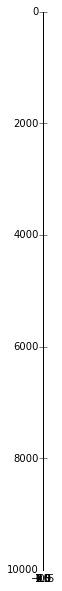

In [73]:
plt.imshow(V_created)

In [74]:
x = io.imread('test_11_img1.gif') 
x = x.flatten()
x.resize((1,10000))
X = np.vstack(tuple(x)) 
X = X.T 

In [83]:
X = X+1E-5

In [174]:
H33,itert33,div33 = nmf_test(X,W19,19,25000)

At iteration 0, the divergence is 165045.464014
At iteration 1, the divergence is 163998.705539
At iteration 2, the divergence is 163056.328728
At iteration 3, the divergence is 162200.862096
At iteration 4, the divergence is 161418.611783
At iteration 5, the divergence is 160698.661451
At iteration 6, the divergence is 160032.169365
At iteration 7, the divergence is 159411.871644
At iteration 8, the divergence is 158831.728917
At iteration 9, the divergence is 158286.672898
At iteration 10, the divergence is 157772.42253
At iteration 11, the divergence is 157285.348541
At iteration 12, the divergence is 156822.371539
At iteration 13, the divergence is 156380.883285
At iteration 14, the divergence is 155958.683863
At iteration 15, the divergence is 155553.929733
At iteration 16, the divergence is 155165.089211
At iteration 17, the divergence is 154790.903028
At iteration 18, the divergence is 154430.348485
At iteration 19, the divergence is 154082.606231
At iteration 20, the divergence

In [175]:
H33

array([[  1.80299355e-001],
       [  2.79292003e-001],
       [  1.01315635e-001],
       [  5.98283327e-176],
       [  2.18422565e-001],
       [  7.90505033e-323],
       [  1.29765287e-001],
       [  3.28032128e-182],
       [  7.73931980e-275],
       [  1.13144194e-001],
       [  2.00260529e-001],
       [  8.27932484e-003],
       [  1.23423341e-001],
       [  8.00603418e-136],
       [  1.01605395e-001],
       [  1.48450784e-001],
       [  1.47217631e-001],
       [  1.15497661e-001],
       [  1.70104685e-001]])

In [176]:
X_created = W19.dot(H33)

In [177]:
X_created.shape

(10000, 1)

In [178]:
X_created.resize((100,100))

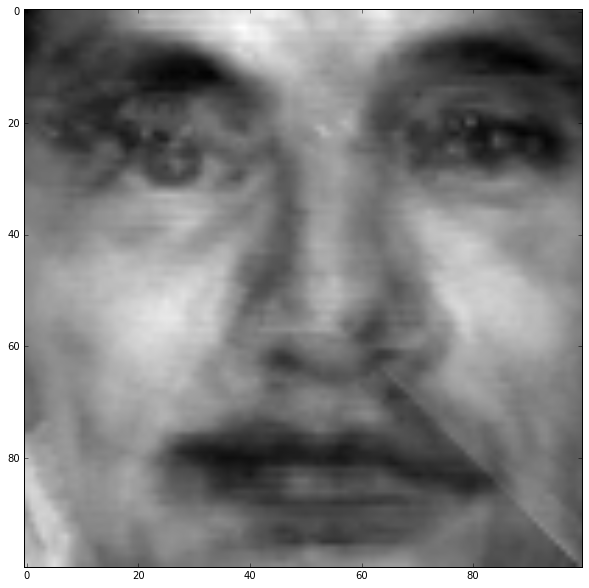

In [179]:
plt.clf()
plt.imshow(X_created) 